## Aim:  To build a model that predicts whether a passenger on the Titanic survived or not.

## IMPORTING REQUIRED LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings(action="ignore")
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

## IMPORTING DATASET

In [2]:
## Load the data from csv file to pandas dataframe
Titanic_data=pd.read_csv("C:\\Users\\win10\\desktop\\Internship Project\\Titanic Data.csv")
Titanic_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [3]:
## Printing the first five rows of the dataframe
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
## Printing the last five rows of the dataframe
Titanic_data.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [5]:
## Number of rows and columns
Titanic_data.shape

(891, 12)

In [6]:
## Getting some information about the data
Titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
## Check the number of missing values in each column
Titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Handling the missing values

In [8]:
## Drop the "Cabin" column from the dataframe
Titanic_data=Titanic_data.drop(columns='Cabin', axis=1)

In [9]:
## Replacing the missing values in "Age" column with mean value
Titanic_data['Age'].fillna (Titanic_data['Age'].mean(),inplace=True)

In [10]:
## Finding the mode value of "Embarked" column
print(Titanic_data['Embarked'].mode())

0    S
Name: Embarked, dtype: object


In [11]:
print(Titanic_data['Embarked'].mode()[0])

S


In [12]:
## Replacing the missing values in "Embarked" column with mode value
Titanic_data['Embarked'].fillna (Titanic_data['Embarked'].mode()[0],inplace=True)

In [13]:
## Check the number of missing values in each column
Titanic_data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [14]:
## Getting some statistical measures about the data
Titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [15]:
## Finding the number of people survived and not survived
Titanic_data['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

## DATA VISUALIZATION

In [16]:
sns.set()

<Axes: xlabel='Survived', ylabel='count'>

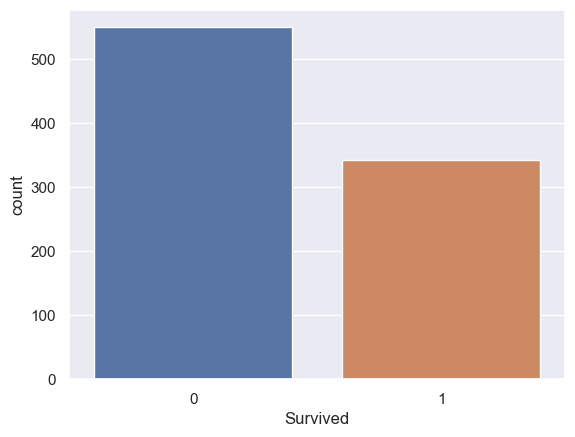

In [17]:
## Making a count plot for "Survived" column
sns.countplot(x=Titanic_data['Survived'], data=Titanic_data)


In [18]:
Titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Survived', ylabel='count'>

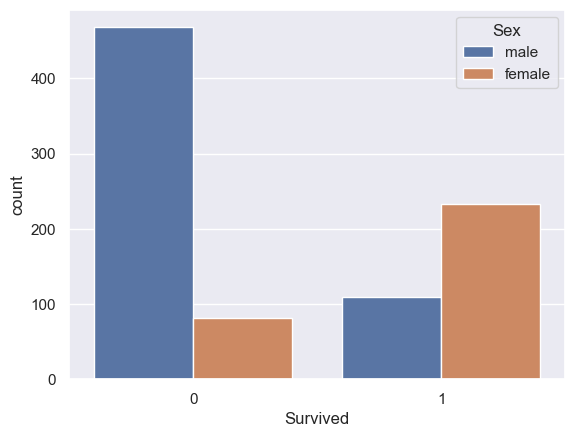

In [19]:
## Number of survivors Genderwise
sns.countplot(x="Survived", hue="Sex",data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='count'>

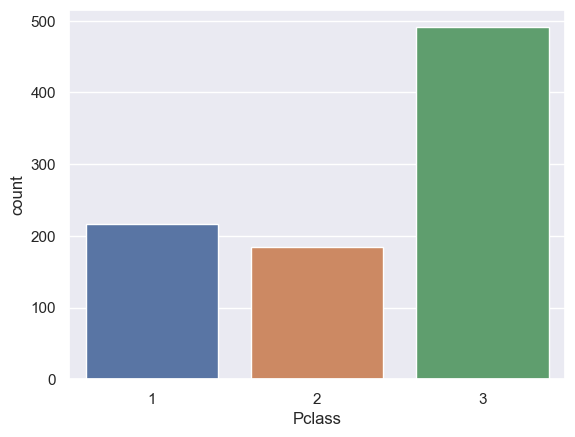

In [21]:
## Making a count plot for "Pclass" column 
sns.countplot(x=Titanic_data['Pclass'], data=Titanic_data)

<Axes: xlabel='Pclass', ylabel='Survived'>

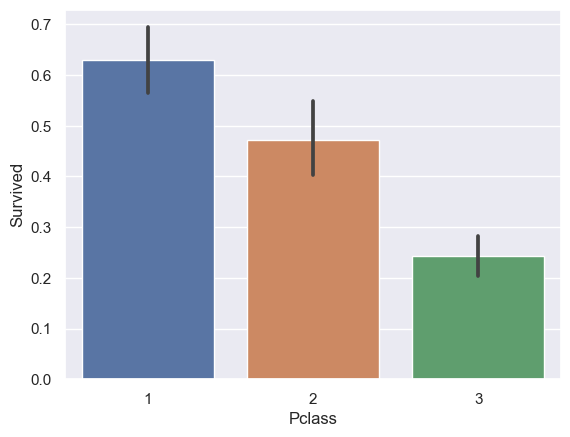

In [26]:
sns.barplot(x='Pclass', y='Survived', data=Titanic_data)

<Axes: xlabel='Embarked', ylabel='Survived'>

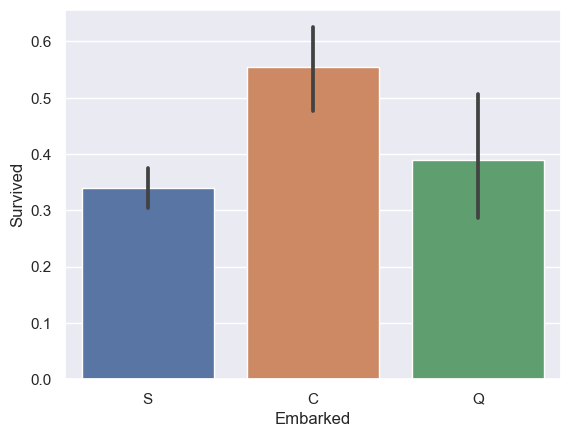

In [27]:
sns.barplot(x='Embarked', y='Survived', data=Titanic_data)

In [28]:
### Encoding the Categorical Columns

In [29]:
Titanic_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [30]:
Titanic_data['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [31]:
## Converting Categorical Column
Titanic_data.replace({'Sex':{'male':0,'female':1},'Embarked':{'S':0,'C':1,'Q':2}},inplace=True)

In [32]:
Titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0


In [33]:
## Separating features and Target


In [34]:
X=Titanic_data.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=Titanic_data['Survived']

In [35]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked
0         3    0  22.000000      1      0   7.2500         0
1         1    1  38.000000      1      0  71.2833         1
2         3    1  26.000000      0      0   7.9250         0
3         1    1  35.000000      1      0  53.1000         0
4         3    0  35.000000      0      0   8.0500         0
..      ...  ...        ...    ...    ...      ...       ...
886       2    0  27.000000      0      0  13.0000         0
887       1    1  19.000000      0      0  30.0000         0
888       3    1  29.699118      1      2  23.4500         0
889       1    0  26.000000      0      0  30.0000         1
890       3    0  32.000000      0      0   7.7500         2

[891 rows x 7 columns]


In [36]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


## SPLITTING THE DATA INTO TRAINING DATA AND TEST DATA

In [37]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=2)

In [38]:
print(X.shape,X_train.shape,X_test.shape)

(891, 7) (712, 7) (179, 7)


## MODEL TRAINING

Logistic Regression

In [39]:
## Training the Logistic Regression model with training data
model=LogisticRegression()
model.fit(X_train,Y_train)
y_pred= model.predict(X_test)                           ## Model Evalution
accuracy = accuracy_score(Y_test, y_pred)         
print('Accuracy score of test data: ',accuracy)

Accuracy score of test data:  0.7821229050279329


In [40]:
print(confusion_matrix(Y_test, y_pred))


[[91  9]
 [30 49]]


In [41]:
conf_matrix = pd.DataFrame(confusion_matrix(Y_test, y_pred))
conf_matrix

,0,1
0,91,9
1,30,49
